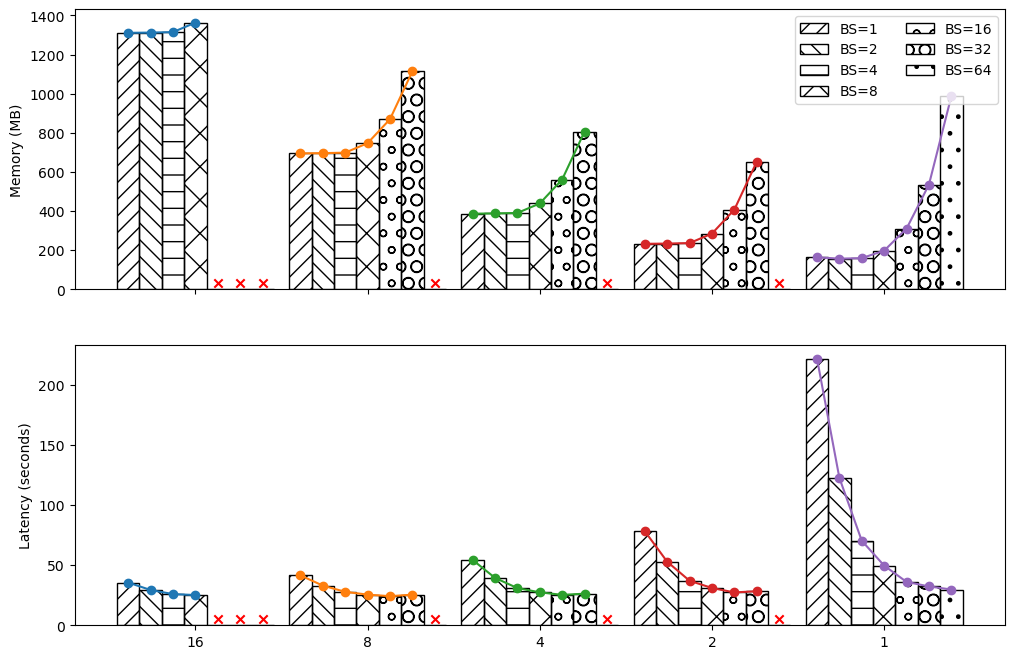

In [49]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np

# 读取CSV文件
df = pd.read_csv('../data/extracted_log_data.csv')

# 提取unique的num_layer_once和BS
num_layer_once_values = sorted(df['num_layer_once'].unique(), reverse=True)
bs_values = sorted(df['BS'].unique())

# 设置柱子的宽度和位置
bar_width = 0.13
index = np.arange(len(num_layer_once_values))

# 创建图表
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# 填充图案
hatches = ['//', '\\\\', '-', 'x', 'o', 'O', '.', '*']

# 绘制Memory的柱状图和折线图
for i, bs in enumerate(bs_values):
    memory_values = []
    for n in num_layer_once_values:
        bs_data = df[(df['BS'] == bs) & (df['num_layer_once'] == n)]
        if not bs_data.empty:
            memory_values.append(bs_data['Memory'].values[0])
        else:
            memory_values.append(None)
    bars = ax1.bar(index + i * bar_width, [v if v is not None else 0 for v in memory_values], 
                   bar_width, label=f'BS={bs}', hatch=hatches[i % len(hatches)], edgecolor='black', fill=False)
    for j, v in enumerate(memory_values):
        if v is None:
            ax1.scatter(index[j] + i * bar_width, 30, color='red', marker='x')

# 绘制Latency的柱状图和折线图
for i, bs in enumerate(bs_values):
    latency_values = []
    for n in num_layer_once_values:
        bs_data = df[(df['BS'] == bs) & (df['num_layer_once'] == n)]
        if not bs_data.empty:
            latency_values.append(bs_data['Latency'].values[0])
        else:
            latency_values.append(None)
    bars = ax2.bar(index + i * bar_width, [v if v is not None else 0 for v in latency_values], 
                   bar_width, label=f'BS={bs}', hatch=hatches[i % len(hatches)], edgecolor='black', fill=False)
    for j, v in enumerate(latency_values):
        if v is None:
            ax2.scatter(index[j] + i * bar_width, 5, color='red', marker='x')

# 绘制Memory的柱状图和折线图
for i, n in enumerate(num_layer_once_values):
    memory_values = []
    for bs in bs_values:
        bs_data = df[(df['BS'] == bs) & (df['num_layer_once'] == n)]
        if not bs_data.empty:
            memory_values.append(bs_data['Memory'].values[0])
        else:
            memory_values.append(None)
    # bars = ax1.bar(index[i] + np.arange(len(bs_values)) * bar_width, 
    #                [v if v is not None else 0 for v in memory_values], 
    #                bar_width, label=f'num_layer_once={n}', 
    #                hatch=hatches[i % len(hatches)], 
    #                edgecolor='black', fill=False)
    # 添加折线图，只在相同num_layer_once组内绘制
    ax1.plot(index[i] + np.arange(len(bs_values)) * bar_width, 
             [v if v is not None else np.nan for v in memory_values], 
             marker='o', linestyle='-')
    # for bar, value in zip(bars, memory_values):
    #     if value is None:
    #         ax1.scatter(bar.get_x() + bar.get_width() / 2, 0, color='red', marker='x')

# 绘制Latency的柱状图和折线图
for i, n in enumerate(num_layer_once_values):
    latency_values = []
    for bs in bs_values:
        bs_data = df[(df['BS'] == bs) & (df['num_layer_once'] == n)]
        if not bs_data.empty:
            latency_values.append(bs_data['Latency'].values[0])
        else:
            latency_values.append(None)
    # bars = ax2.bar(index[i] + np.arange(len(bs_values)) * bar_width, 
    #                [v if v is not None else 0 for v in latency_values], 
    #                bar_width, label=f'num_layer_once={n}', 
    #                hatch=hatches[i % len(hatches)], 
    #                edgecolor='black', fill=False)
    # 添加折线图，只在相同num_layer_once组内绘制
    ax2.plot(index[i] + np.arange(len(bs_values)) * bar_width, 
             [v if v is not None else np.nan for v in latency_values], 
             marker='o', linestyle='-')
    # for bar, value in zip(bars, latency_values):
    #     if value is None:
    #         ax2.scatter(bar.get_x() + bar.get_width() / 2, 0, color='red', marker='x')

# 设置X轴
ax2.set_xticks(index + bar_width * (len(bs_values) - 1) / 2)
ax2.set_xticklabels(num_layer_once_values)

# 设置Y轴标签
ax1.set_ylabel('Memory (MB)')
ax2.set_ylabel('Latency (seconds)')

# 设置图表标题
# ax1.set_title('Memory and Latency vs num_layer_once')

# 显示图例
ax1.legend(loc='upper right', ncol=2)

# 显示图表
plt.savefig('../figs/memory_latency_vs_num_layer_once.pdf')
plt.show()

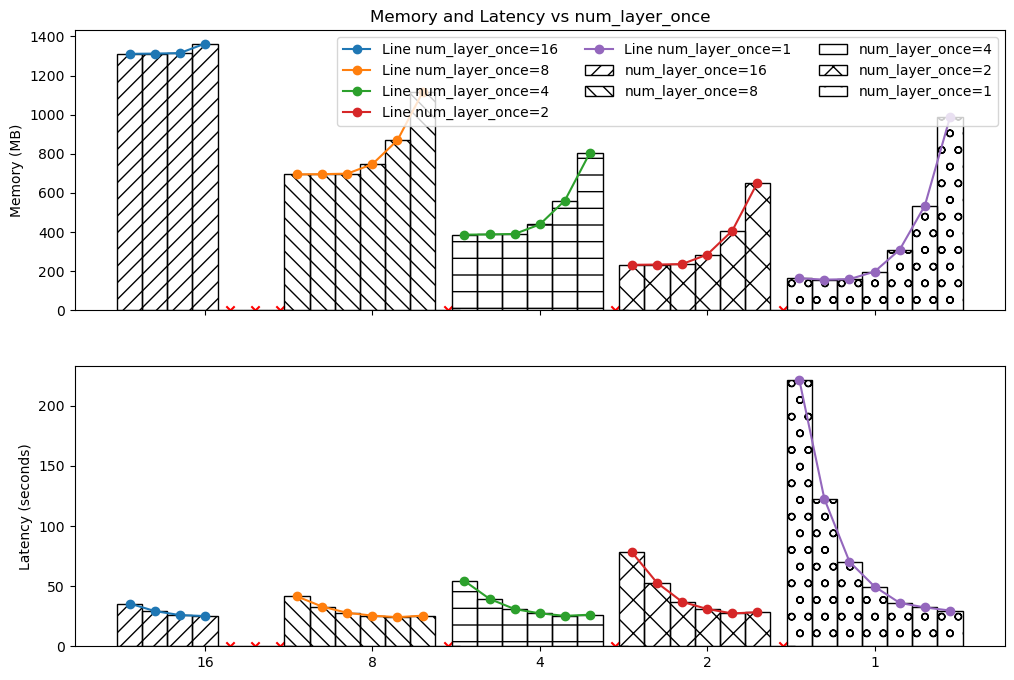

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('../data/extracted_log_data.csv')

# 提取unique的num_layer_once和BS
num_layer_once_values = sorted(df['num_layer_once'].unique(), reverse=True)
bs_values = sorted(df['BS'].unique())

# 设置柱子的宽度和位置
bar_width = 0.15
index = np.arange(len(num_layer_once_values))

# 创建图表
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# 填充图案
hatches = ['//', '\\\\', '-', 'x', 'o', 'O', '.', '*']

# 绘制Memory的柱状图和折线图
for i, n in enumerate(num_layer_once_values):
    memory_values = []
    for bs in bs_values:
        bs_data = df[(df['BS'] == bs) & (df['num_layer_once'] == n)]
        if not bs_data.empty:
            memory_values.append(bs_data['Memory'].values[0])
        else:
            memory_values.append(None)
    bars = ax1.bar(index[i] + np.arange(len(bs_values)) * bar_width, 
                   [v if v is not None else 0 for v in memory_values], 
                   bar_width, label=f'num_layer_once={n}', 
                   hatch=hatches[i % len(hatches)], 
                   edgecolor='black', fill=False)
    # 添加折线图，只在相同num_layer_once组内绘制
    ax1.plot(index[i] + np.arange(len(bs_values)) * bar_width, 
             [v if v is not None else np.nan for v in memory_values], 
             marker='o', linestyle='-', label=f'Line num_layer_once={n}')
    for bar, value in zip(bars, memory_values):
        if value is None:
            ax1.scatter(bar.get_x() + bar.get_width() / 2, 0, color='red', marker='x')

# 绘制Latency的柱状图和折线图
for i, n in enumerate(num_layer_once_values):
    latency_values = []
    for bs in bs_values:
        bs_data = df[(df['BS'] == bs) & (df['num_layer_once'] == n)]
        if not bs_data.empty:
            latency_values.append(bs_data['Latency'].values[0])
        else:
            latency_values.append(None)
    bars = ax2.bar(index[i] + np.arange(len(bs_values)) * bar_width, 
                   [v if v is not None else 0 for v in latency_values], 
                   bar_width, label=f'num_layer_once={n}', 
                   hatch=hatches[i % len(hatches)], 
                   edgecolor='black', fill=False)
    # 添加折线图，只在相同num_layer_once组内绘制
    ax2.plot(index[i] + np.arange(len(bs_values)) * bar_width, 
             [v if v is not None else np.nan for v in latency_values], 
             marker='o', linestyle='-', label=f'Line num_layer_once={n}')
    for bar, value in zip(bars, latency_values):
        if value is None:
            ax2.scatter(bar.get_x() + bar.get_width() / 2, 0, color='red', marker='x')

# 设置X轴
ax2.set_xticks(index + bar_width * (len(bs_values) - 1) / 2)
ax2.set_xticklabels(num_layer_once_values)

# 设置Y轴标签
ax1.set_ylabel('Memory (MB)')
ax2.set_ylabel('Latency (seconds)')

# 设置图表标题
ax1.set_title('Memory and Latency vs num_layer_once')

# 显示图例
ax1.legend(loc='upper right', ncol=3)

# 显示图表
plt.savefig('../figs/memory_latency_vs_num_layer_once.pdf')
plt.show()

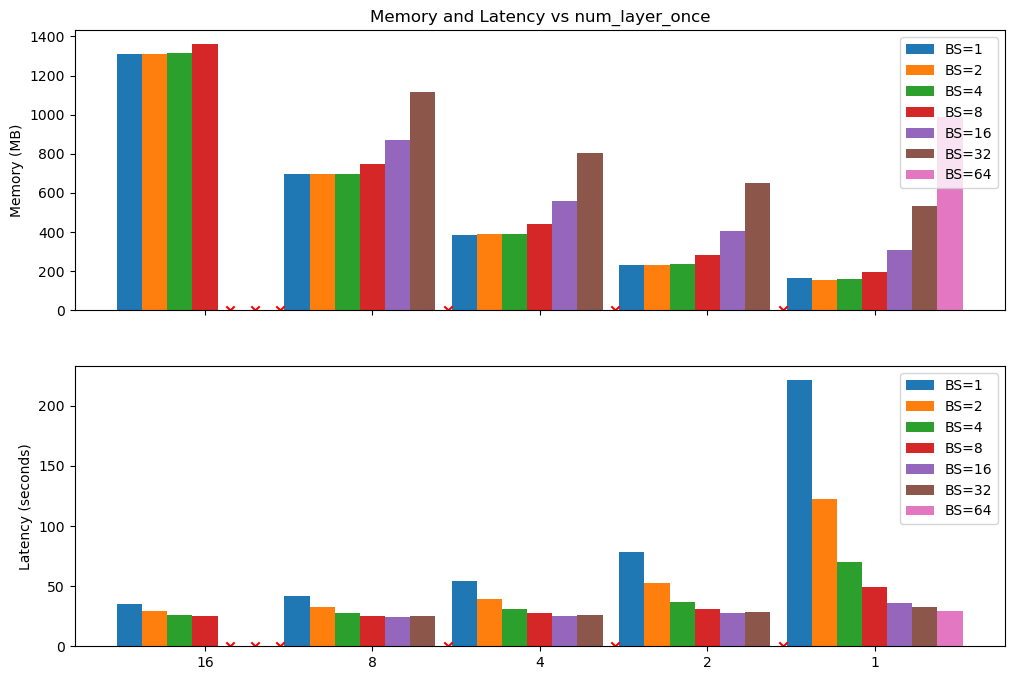

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('../data/extracted_log_data.csv')

# 提取unique的num_layer_once和BS
num_layer_once_values = sorted(df['num_layer_once'].unique(), reverse=True)
bs_values = sorted(df['BS'].unique())

# 设置柱子的宽度和位置
bar_width = 0.15
index = np.arange(len(num_layer_once_values))

# 创建图表
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# 绘制Memory的柱状图
for i, bs in enumerate(bs_values):
    memory_values = []
    for n in num_layer_once_values:
        bs_data = df[(df['BS'] == bs) & (df['num_layer_once'] == n)]
        if not bs_data.empty:
            memory_values.append(bs_data['Memory'].values[0])
        else:
            memory_values.append(None)
    ax1.bar(index + i * bar_width, [v if v is not None else 0 for v in memory_values], bar_width, label=f'BS={bs}')
    for j, v in enumerate(memory_values):
        if v is None:
            ax1.scatter(index[j] + i * bar_width, 0, color='red', marker='x')

# 绘制Latency的柱状图
for i, bs in enumerate(bs_values):
    latency_values = []
    for n in num_layer_once_values:
        bs_data = df[(df['BS'] == bs) & (df['num_layer_once'] == n)]
        if not bs_data.empty:
            latency_values.append(bs_data['Latency'].values[0])
        else:
            latency_values.append(None)
    ax2.bar(index + i * bar_width, [v if v is not None else 0 for v in latency_values], bar_width, label=f'BS={bs}')
    for j, v in enumerate(latency_values):
        if v is None:
            ax2.scatter(index[j] + i * bar_width, 0, color='red', marker='x')

# 设置X轴
ax2.set_xticks(index + bar_width * (len(bs_values) - 1) / 2)
ax2.set_xticklabels(num_layer_once_values)

# 设置Y轴标签
ax1.set_ylabel('Memory (MB)')
ax2.set_ylabel('Latency (seconds)')

# 设置图表标题
ax1.set_title('Memory and Latency vs num_layer_once')

# 显示图例
ax1.legend()
ax2.legend()

# 显示图表
plt.show()